# Project Overview and dataset

### Our task is to classify a Hotel Reservation as either booking canceled (class1) or no canceled(class0).

### We use Hotel Reservation Database which is available on <a href = https://www.kaggle.com> Kaggle </a> You can view and download the dataset from this <a href = https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/code> Link </a> .

In [1]:
# Read dataset.
import pandas as pd

data = pd.read_csv('Hotel Reservations.csv')

data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [2]:
# Show the data types of parameters.
data.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

# Encoding dataset

In [3]:
# Show types of data.
print(data['type_of_meal_plan'].unique())
print(data['room_type_reserved'].unique())
print(data['market_segment_type'].unique())
print(data['booking_status'].unique())

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
['Not_Canceled' 'Canceled']


In [4]:
# Encoding dataset ==> binary and ordinary only.
data_encoding = data.replace({
    'room_type_reserved': {'Room_Type 1': 0, 'Room_Type 2': 1, 'Room_Type 3': 2,
                           'Room_Type 4': 3, 'Room_Type 5': 4, 'Room_Type 6': 5, 'Room_Type 7': 6},
    'booking_status': {'Not_Canceled': 0, 'Canceled': 1}
})

data_encoding.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,0,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,0,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,0,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,0,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,0,48,2018,4,11,Online,0,0,0,94.50,0,1


In [5]:
# Drop the first column that mean index of row.
data_without_id = data_encoding.drop(columns = ['Booking_ID'])

data_without_id.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,0,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,0,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,0,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,0,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,0,48,2018,4,11,Online,0,0,0,94.50,0,1


In [6]:
# One Hot encoding to deal with nominal data.
hot_data_encoding = pd.get_dummies(data_without_id)

hot_data_encoding.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,0,224,2017,10,2,...,0,1,0,0,0,0,0,0,1,0
1,2,0,2,3,0,0,5,2018,11,6,...,0,0,0,0,1,0,0,0,0,1
2,1,0,2,1,0,0,1,2018,2,28,...,1,1,0,0,0,0,0,0,0,1
3,2,0,0,2,0,0,211,2018,5,20,...,1,1,0,0,0,0,0,0,0,1
4,2,0,1,1,0,0,48,2018,4,11,...,1,0,0,0,1,0,0,0,0,1


In [7]:
# Show the data types of parameters.
hot_data_encoding.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
type_of_meal_plan_Meal Plan 1             uint8
type_of_meal_plan_Meal Plan 2             uint8
type_of_meal_plan_Meal Plan 3             uint8
type_of_meal_plan_Not Selected            uint8
market_segment_type_Aviation            

In [8]:
mask = hot_data_encoding.isnull().any(axis = 1)
clean_data = hot_data_encoding[~mask]

print(len(clean_data))
print(len(data))

36275
36275


# Splitting dataset to input and output

In [9]:
# Splitting data to input and output.
data_input = hot_data_encoding.drop(columns = ['booking_status'])
data_output = hot_data_encoding['booking_status']

# Show the input of dataset only.
data_input.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,0,224,2017,10,2,...,0,1,0,0,0,0,0,0,1,0
1,2,0,2,3,0,0,5,2018,11,6,...,1,0,0,0,1,0,0,0,0,1
2,1,0,2,1,0,0,1,2018,2,28,...,0,1,0,0,0,0,0,0,0,1
3,2,0,0,2,0,0,211,2018,5,20,...,0,1,0,0,0,0,0,0,0,1
4,2,0,1,1,0,0,48,2018,4,11,...,0,0,0,0,1,0,0,0,0,1


In [10]:
# Show the output of dataset only.
data_output.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

In [11]:
# Show the element in the output.
data_output.unique()

array([0, 1], dtype=int64)

# Splitting dataset into Training, Validation and Testing

In [12]:
# Splitting dataset to ( Training , Validation , Testing ).
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(data_input, data_output,
                                        test_size = 0.20, random_state = 2)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [13]:
# Show the shape of train, validation and Testing.
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(23216, 24)
(23216,)
(5804, 24)
(5804,)
(7255, 24)
(7255,)


# Helper Function: evalute_classifier

In [14]:
def evalute_model(clf, x_train, x_val, y_train, y_val):
    
    """
    This Function is used to take any model and traing it then predict output and caluclate accuracy.
    Input:
    clf ==> Any model need to calculate accuracy.
    x_train ==> Part of dataset that train data with it.
    x_val ==> Part of dataset that see the validation of data with it.
    Output:
    y_train ==> Part of dataset that train data with it.
    y_val ==> Part of dataset that see the validation of data with it.
    Calculate accuracy of training and validation and return them.
    """
    # Train Model.
    clf.fit(x_train, y_train)
    
    # Predict values of Train and valdation.
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_val)
    
    # Calculate accuracy of train and testing.
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    
    print(clf.__class__.__name__)
    print("Accuracy of training: ", acc_train)
    print("Accuracy of valdation: ", acc_val)
    print('-------------------------------------')
    return acc_train, acc_val

# Feature Scaling

In [15]:
# Saling the dataset to be in the same range.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# DecisionTree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [38]:
# Take object from model.
dt = DecisionTreeClassifier(max_depth = 7, random_state = 2)

acc_train, acc_val = evalute_model(dt, x_train, x_val, y_train, y_val)

# Two list have train and accuracy of all model.
acc_train_models = []
acc_val_models = []

# Add accuracy of train and validation to list.
acc_train_models.append(acc_train)
acc_val_models.append(acc_val)

DecisionTreeClassifier
Accuracy of training:  0.8563490696071675
Accuracy of valdation:  0.8569951757408684
-------------------------------------


In [19]:
# Make for loop to change the deepth of DecisionTree and know what the best result. 
max_depth_values = [1,2,3,4,5,6,7,8]
accu_train_values = []
accu_val_values = []

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 2)
    accu_train, accu_val = evalute_model(model, x_train_scaled, x_val_scaled, y_train, y_val)
    accu_train_values.append(accu_train)
    accu_val_values.append(accu_val)

DecisionTreeClassifier
Accuracy of training:  0.7590885596140593
Accuracy of valdation:  0.7672294968986906
-------------------------------------
DecisionTreeClassifier
Accuracy of training:  0.7590885596140593
Accuracy of valdation:  0.7672294968986906
-------------------------------------
DecisionTreeClassifier
Accuracy of training:  0.7864403859407305
Accuracy of valdation:  0.7858373535492763
-------------------------------------
DecisionTreeClassifier
Accuracy of training:  0.8190902825637492
Accuracy of valdation:  0.8202963473466575
-------------------------------------
DecisionTreeClassifier
Accuracy of training:  0.8330461750516885
Accuracy of valdation:  0.8306340454858718
-------------------------------------
DecisionTreeClassifier
Accuracy of training:  0.842565472088215
Accuracy of valdation:  0.8409717436250862
-------------------------------------
DecisionTreeClassifier
Accuracy of training:  0.8563490696071675
Accuracy of valdation:  0.8569951757408684
-----------------

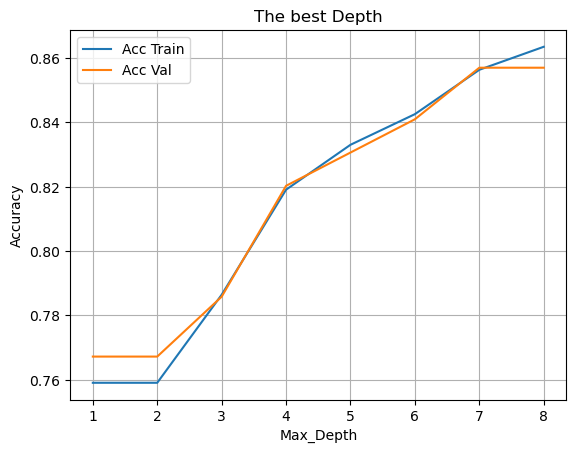

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(max_depth_values, accu_train_values, label = 'Acc Train')
plt.plot(max_depth_values, accu_val_values, label = 'Acc Val')
plt.grid(axis = 'both')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.title('The best Depth')
plt.legend()
plt.show()

# SVC Classifier

In [21]:
from sklearn.svm import SVC

In [39]:
# Take object from svc ==> (kernel = 'linear')
svc_model = SVC(kernel = 'linear', random_state = 2, C = 0.01)

accu_train, accu_val = evalute_model(svc_model, x_train_scaled, x_val_scaled, y_train, y_val)

# Add accuracy of train and validation to list.
acc_train_models.append(acc_train)
acc_val_models.append(acc_val)

SVC
Accuracy of training:  0.7987594762232942
Accuracy of valdation:  0.8087525844245348
-------------------------------------


In [40]:
# Take object from svc ==> (kernel = 'poly')
svc_model_1 = SVC(kernel = 'poly', degree = 4, random_state = 2, C = 50)

accu_train, accu_val = evalute_model(svc_model_1, x_train_scaled, x_val_scaled, y_train, y_val)

# Add accuracy of train and validation to list.
acc_train_models.append(acc_train)
acc_val_models.append(acc_val)

SVC
Accuracy of training:  0.8830117160578911
Accuracy of valdation:  0.8544107512060648
-------------------------------------


In [41]:
# Take object from svc ==> (kernel = 'rbf') 
# Note: The default is kernel = 'rbf'
svc_model_2 = SVC(kernel = 'rbf', gamma = 0.2, random_state = 2, C = 50)

accu_train, accu_val = evalute_model(svc_model_2, x_train_scaled, x_val_scaled, y_train, y_val)

# Add accuracy of train and validation to list.
acc_train_models.append(acc_train)
acc_val_models.append(acc_val)

SVC
Accuracy of training:  0.9455547898001379
Accuracy of valdation:  0.8604410751206065
-------------------------------------


# LogisticRegreesion Classifier

In [42]:
# Import model LogisticRegression.
from sklearn.linear_model import LogisticRegression

# Take object from model.
lr = LogisticRegression()

accu_train, accu_val = evalute_model(lr, x_train_scaled, x_val_scaled, y_train, y_val)

# Add accuracy of train and validation to list.
acc_train_models.append(acc_train)
acc_val_models.append(acc_val)

LogisticRegression
Accuracy of training:  0.8010854583046175
Accuracy of valdation:  0.8115093039283253
-------------------------------------


# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_c = RandomForestClassifier(n_estimators = 250, max_depth = 12, random_state = 1)

acc_train, acc_val = evalute_model(rf_c, x_train_scaled, x_val_scaled, y_train, y_val)

# Add accuracy of train and validation to list.
acc_train_models.append(acc_train)
acc_val_models.append(acc_val)

RandomForestClassifier
Accuracy of training:  0.8964507236388698
Accuracy of valdation:  0.8835286009648519
-------------------------------------


In [60]:
max_estimators_vlaues = [100, 200, 300, 400, 500, 600 ,700 ,800]
max_depth_values = [9, 10, 11, 12, 13, 14, 15, 16]
acc_train_values = []
acc_val_values = []

for max_depth in max_depth_values:
    rf_c = RandomForestClassifier(n_estimators = 250, max_depth = max_depth, random_state = 1)
    acc_train, acc_val = evalute_model(rf_c, x_train_scaled, x_val_scaled, y_train, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)

RandomForestClassifier
Accuracy of training:  0.870907994486561
Accuracy of valdation:  0.8688835286009648
-------------------------------------
RandomForestClassifier
Accuracy of training:  0.8796950379048932
Accuracy of valdation:  0.8735354927636113
-------------------------------------
RandomForestClassifier
Accuracy of training:  0.8878790489317712
Accuracy of valdation:  0.8793935217091661
-------------------------------------
RandomForestClassifier
Accuracy of training:  0.8969676085458305
Accuracy of valdation:  0.8828394210889042
-------------------------------------
RandomForestClassifier
Accuracy of training:  0.9014903514817367
Accuracy of valdation:  0.8852515506547208
-------------------------------------
RandomForestClassifier
Accuracy of training:  0.9078221915920055
Accuracy of valdation:  0.8873190902825637
-------------------------------------
RandomForestClassifier
Accuracy of training:  0.9158769813921434
Accuracy of valdation:  0.8885251550654721
-----------------

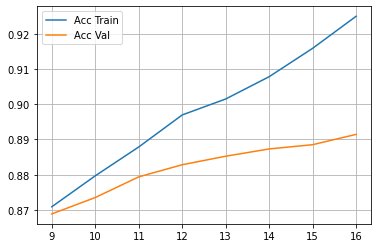

In [61]:
# Show your accuracy of training and validation.

plt.plot(max_depth_values, acc_train_values, label = 'Acc Train')
plt.plot(max_depth_values, acc_val_values, label = 'Acc Val')
plt.grid('both')
plt.legend()
plt.show()

# Extemely Random Treees(Extra-Trees)

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

et_c = ExtraTreesClassifier(n_estimators = 300, max_depth = 25, random_state = 1)
acc_train, acc_val = evalute_model(et_c, x_train_scaled, x_val_scaled, y_train, y_val)

# Add accuracy of train and validation to list.
acc_train_models.append(acc_train)
acc_val_models.append(acc_val)

ExtraTreesClassifier
Accuracy of training:  0.983459682977257
Accuracy of valdation:  0.8914541695382495
-------------------------------------


In [27]:
max_depth_values = [5, 10, 15, 20, 25, 30, 35, 40]
acc_train_values = []
acc_val_values = []

for max_depth in values_max_depth:
    et_c = ExtraTreesClassifier(n_estimators = 300, max_depth = max_depth, random_state = 1)
    acc_train, acc_val = evalute_model(et_c, x_train_scaled, x_val_scaled, y_train, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)

ExtraTreesClassifier
Accuracy of training:  0.7148518263266712
Accuracy of valdation:  0.7253618194348725
-------------------------------------
ExtraTreesClassifier
Accuracy of training:  0.801473121984838
Accuracy of valdation:  0.8035837353549277
-------------------------------------
ExtraTreesClassifier
Accuracy of training:  0.8813318401102688
Accuracy of valdation:  0.8635423845623708
-------------------------------------
ExtraTreesClassifier
Accuracy of training:  0.9355186078566505
Accuracy of valdation:  0.8840454858718125
-------------------------------------
ExtraTreesClassifier
Accuracy of training:  0.983459682977257
Accuracy of valdation:  0.8914541695382495
-------------------------------------
ExtraTreesClassifier
Accuracy of training:  0.994486560992419
Accuracy of valdation:  0.8914541695382495
-------------------------------------
ExtraTreesClassifier
Accuracy of training:  0.9945727084769125
Accuracy of valdation:  0.8905926946933149
---------------------------------

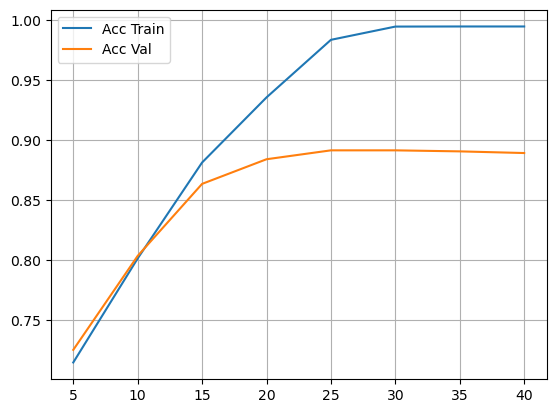

In [28]:
plt.plot(max_depth_values, acc_train_values, label = 'Acc Train')
plt.plot(max_depth_values, acc_val_values, label = 'Acc Val' )
plt.grid('both')
plt.legend()
plt.show()

# Bagging from Ensemble

In [32]:
from sklearn.ensemble import BaggingClassifier

In [36]:
best_values = [20, 30, 60, 80, 100, 120, 140, 160]

# Two list 
acc_train_values = []
acc_val_values = []

for best_value in best_values:
    model = BaggingClassifier(
    LogisticRegression(random_state = 1), n_estimators = best_value,
    max_samples = 0.75, bootstrap = True, random_state = 1, n_jobs = -1,
)
    acc_train_bag, acc_val_bag = evalute_model(model, x_train_scaled, x_val_scaled, y_train, y_val)
    acc_train_values.append(acc_train_bag)
    acc_val_values.append(acc_val_bag)

BaggingClassifier
Accuracy of training:  0.8009562370778773
Accuracy of valdation:  0.8109924190213645
-------------------------------------
BaggingClassifier
Accuracy of training:  0.8003962784286699
Accuracy of valdation:  0.8108201240523777
-------------------------------------
BaggingClassifier
Accuracy of training:  0.8008700895933839
Accuracy of valdation:  0.8108201240523777
-------------------------------------
BaggingClassifier
Accuracy of training:  0.8009131633356306
Accuracy of valdation:  0.8111647139903515
-------------------------------------
BaggingClassifier
Accuracy of training:  0.8008700895933839
Accuracy of valdation:  0.8115093039283253
-------------------------------------
BaggingClassifier
Accuracy of training:  0.8007839421088904
Accuracy of valdation:  0.8115093039283253
-------------------------------------
BaggingClassifier
Accuracy of training:  0.8006547208821503
Accuracy of valdation:  0.8113370089593384
-------------------------------------
BaggingClassi

In [45]:
 # Add accuracy of train and validation to list.
acc_train_models.append(acc_train_bag)
acc_val_models.append(acc_val_bag)

In [46]:
# Dectionary have 3 list.
# model ==> name of model , train ==> accuracy of train , val ==> accuracy of val
all_result = {
    'model': [],
    'train': [],
    'val': []
}

all_result['model'] = ['decsion_tree', 'svc_ln', 'svc_poly', 'svc_rbf', 
                       'logistic', 'random_forest', 'extra_tree', 'bagging']
all_result['train'] = acc_train_models
all_result['val'] = acc_val_models

In [48]:
# Put the dictionary in data_frame.
all_result_df = pd.DataFrame(all_result)

all_result_df

,model,train,val
0,decsion_tree,0.856349,0.856995
1,svc_ln,0.856349,0.856995
2,svc_poly,0.856349,0.856995
3,svc_rbf,0.856349,0.856995
4,logistic,0.856349,0.856995
5,random_forest,0.896451,0.883529
6,extra_tree,0.983460,0.891454
7,bagging,0.800569,0.811165


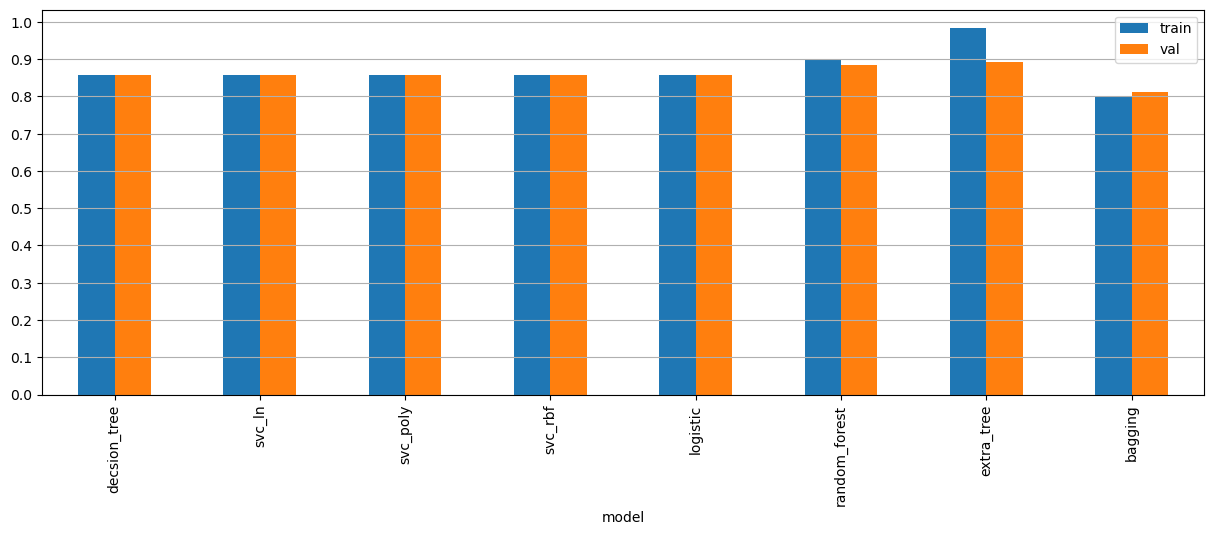

In [53]:
# Graph to compare between model.
import numpy as np

all_result_df.plot.bar(x = 'model', y = ['train', 'val'], figsize = (15, 5))
plt.yticks(np.arange(0.0,1.1,0.1))
plt.grid(axis = 'y')
plt.legend()
plt.show()

In [54]:
# Take the bests model.
best_model = et_c

# Train Model.
et_c.fit(x_train_scaled, y_train)

# Predict the values of testing.
y_test_pred = et_c.predict(x_test_scaled)

# Calculate accuracy of testing.
accuracy_score(y_test, y_test_pred)

0.8960716747070986